## Importing Libraries

In [63]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

In [64]:

# Load datasets
customers_df = pd.read_csv('https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE&export=download')
products_df = pd.read_csv('https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0&export=download')
transactions_df = pd.read_csv('https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF&export=download')

# Convert date columns to datetime
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

In [65]:
print("Customers Dataset Shape:", customers_df.shape)
print("\nCustomers Dataset :")
display(customers_df.head())

print("\nProducts Dataset Shape:", products_df.shape)
print("\nProducts Dataset :")
display(products_df.head())

print("\nTransactions Dataset Shape:", transactions_df.shape)
print("\nTransactions Dataset :")
display(transactions_df.head())

Customers Dataset Shape: (200, 4)

Customers Dataset :


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15



Products Dataset Shape: (100, 4)

Products Dataset :


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31



Transactions Dataset Shape: (1000, 7)

Transactions Dataset :


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


## EDA on Datasets

### Basic exploration of dataset

In [66]:
# Basic data exploration for each dataset
def explore_dataset(df, name):
    print(f"\n{'='*50}")
    print(f"{name} Dataset Exploration")
    print(f"{'='*50}")
    print("\nFirst few rows:")
    print(df.head())
    print("\nDataset Info:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nBasic Statistics:")
    print(df.describe())

# Explore each dataset
explore_dataset(customers_df, "Customers")





Customers Dataset Exploration

First few rows:
  CustomerID        CustomerName         Region SignupDate
0      C0001    Lawrence Carroll  South America 2022-07-10
1      C0002      Elizabeth Lutz           Asia 2022-02-13
2      C0003      Michael Rivera  South America 2024-03-07
3      C0004  Kathleen Rodriguez  South America 2022-10-09
4      C0005         Laura Weber           Asia 2022-08-15

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None

Missing Values:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Basic Statis

In [67]:
explore_dataset(products_df, "Products")


Products Dataset Exploration

First few rows:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Missing Values:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Basic Statistics:
            Price
count  100.000000
mean   267.551700
std    

In [68]:

explore_dataset(transactions_df, "Transactions")


Transactions Dataset Exploration

First few rows:
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        

### Customer Analysis


Customer Analysis


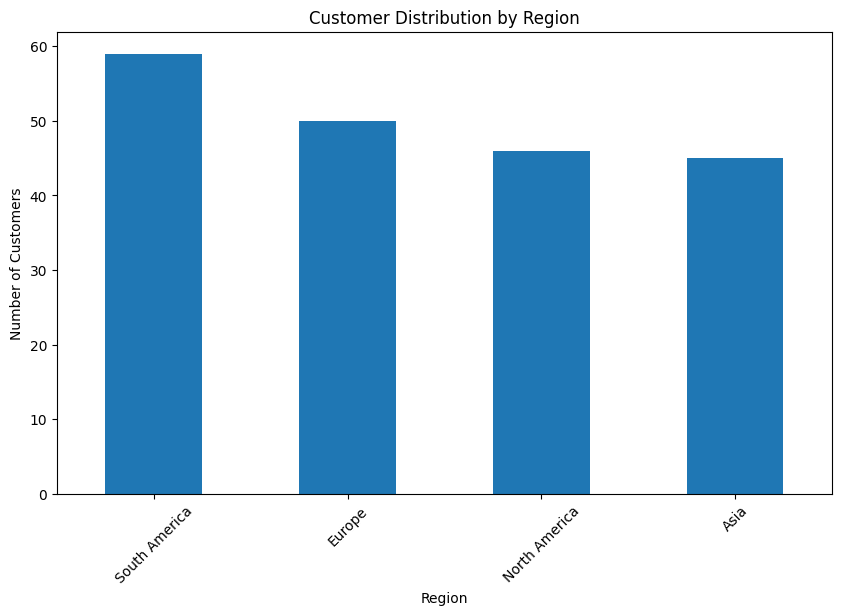

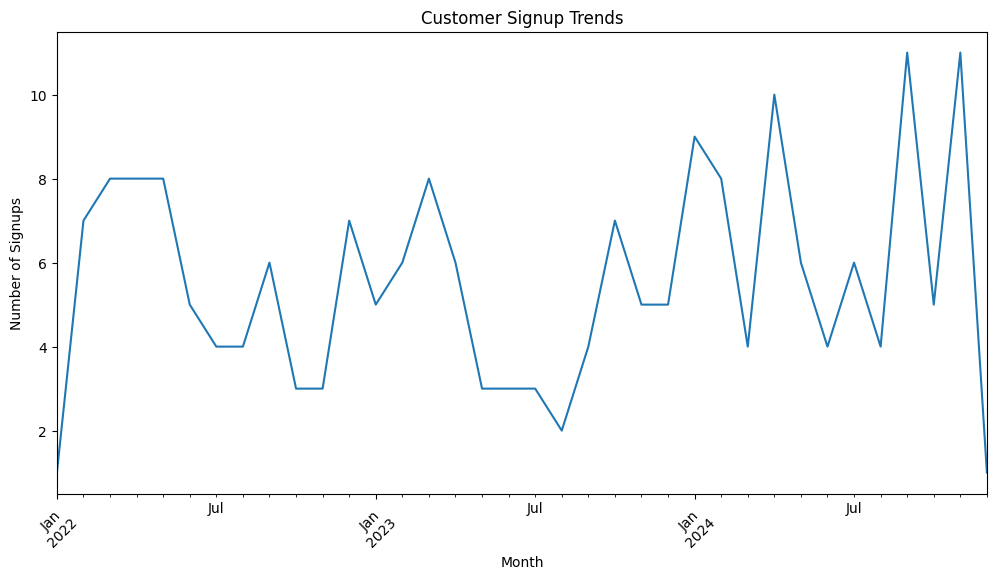


Customer Age Statistics (in days):
count     200.000000
mean      527.645000
std       325.526568
min         0.000000
25%       259.500000
50%       484.500000
75%       823.500000
max      1071.000000
Name: CustomerAge, dtype: float64


In [69]:
# 1. Customer Analysis
def analyze_customers():
    print("\nCustomer Analysis")
    print("="*50)

    # Customer distribution by region
    plt.figure(figsize=(10, 6))
    customers_df['Region'].value_counts().plot(kind='bar')
    plt.title('Customer Distribution by Region')
    plt.xlabel('Region')
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=45)
    plt.show()

    # Customer signup trends
    plt.figure(figsize=(12, 6))
    customers_df['SignupDate'].dt.to_period('M').value_counts().sort_index().plot(kind='line')
    plt.title('Customer Signup Trends')
    plt.xlabel('Month')
    plt.ylabel('Number of Signups')
    plt.xticks(rotation=45)
    plt.show()

    # Calculate customer lifetime
    customers_df['CustomerAge'] = (transactions_df['TransactionDate'].max() - customers_df['SignupDate']).dt.days

    print("\nCustomer Age Statistics (in days):")
    print(customers_df['CustomerAge'].describe())


# Run the analyses
analyze_customers()

### Product Analysis


Product Analysis


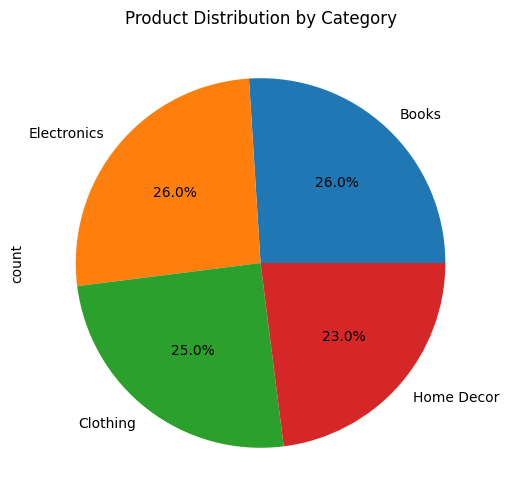

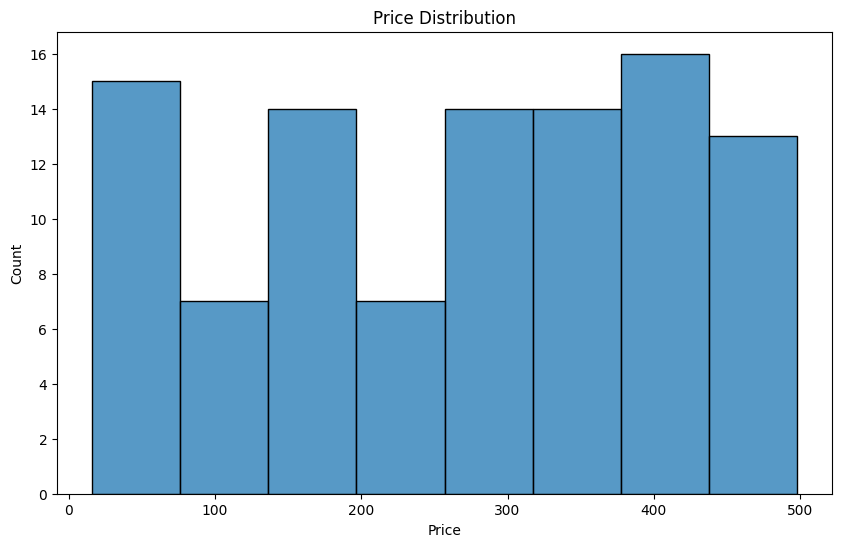


Price Statistics by Category:
             count        mean         std    min       25%     50%       75%  \
Category                                                                        
Books         26.0  292.212308  153.800135  33.59  154.2975  337.94  419.2125   
Clothing      25.0  263.720000  157.965038  18.82  126.3400  303.50  389.2000   
Electronics   26.0  275.353462  137.056612  16.08  168.8000  282.72  394.3650   
Home Decor    23.0  235.020000  122.236552  41.18  142.3800  235.58  314.9750   

                max  
Category             
Books        497.76  
Clothing     481.78  
Electronics  459.86  
Home Decor   454.53  


In [70]:
# 2. Product Analysis
def analyze_products():
    print("\nProduct Analysis")
    print("="*50)

    # Product distribution by category
    plt.figure(figsize=(10, 6))
    products_df['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title('Product Distribution by Category')
    plt.show()

    # Price distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(products_df['Price'])
    plt.title('Price Distribution')
    plt.xlabel('Price')
    plt.ylabel('Count')
    plt.show()

    print("\nPrice Statistics by Category:")
    print(products_df.groupby('Category')['Price'].describe())

analyze_products()

### Transaction Analysis


Transaction Analysis


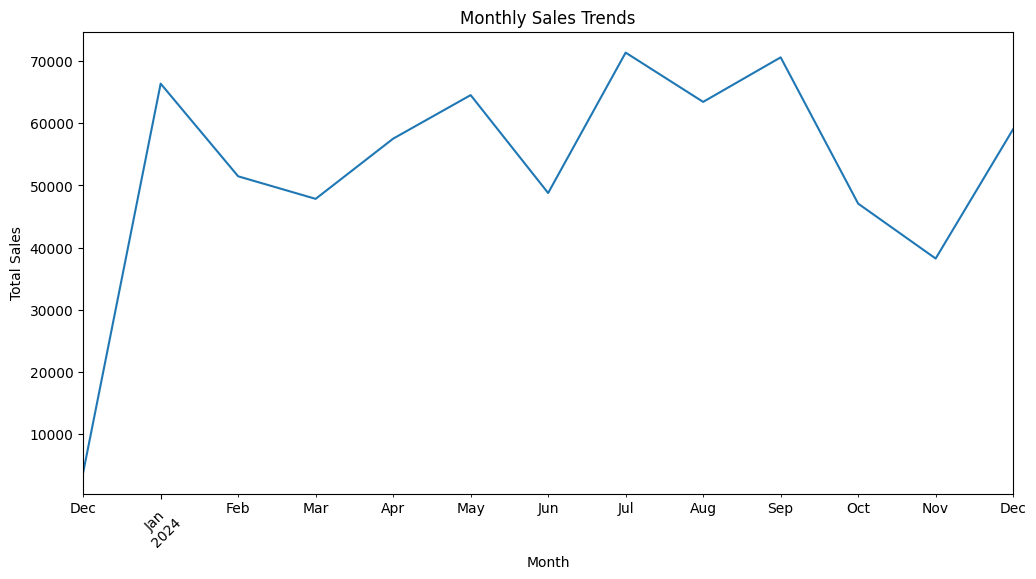

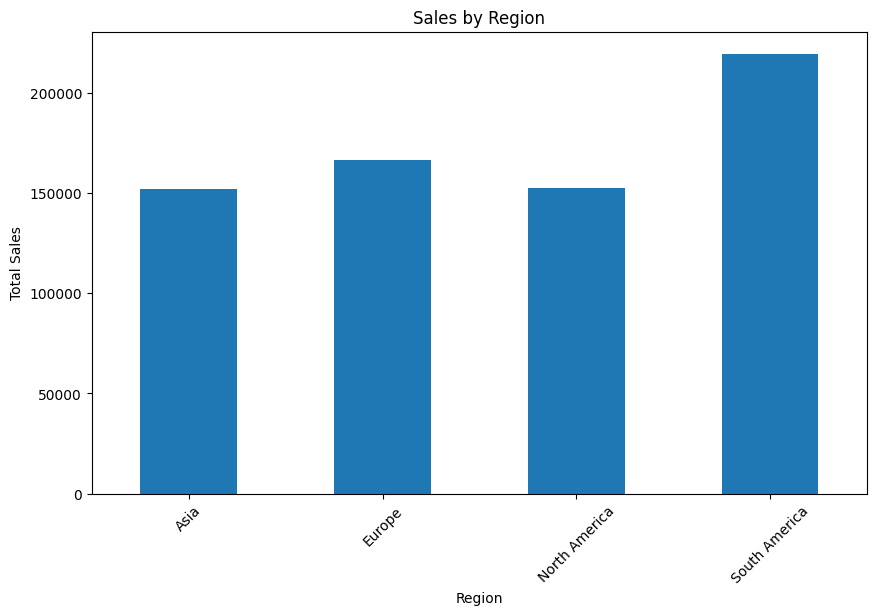

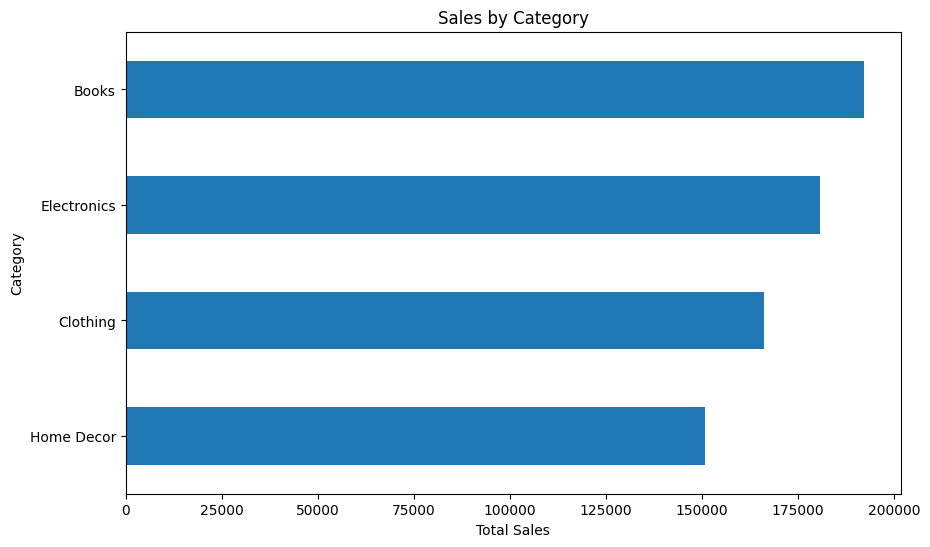


Transaction Metrics:
Total Revenue: $689,995.56
Average Transaction Value: $690.00
Total Number of Transactions: 1,000


In [71]:
# 3. Transaction Analysis
def analyze_transactions():
    print("\nTransaction Analysis")
    print("="*50)

    # Merge with customer and product data
    full_data = transactions_df.merge(customers_df[['CustomerID', 'Region']], on='CustomerID')\
                              .merge(products_df[['ProductID', 'Category']], on='ProductID')

    # Transaction trends over time
    plt.figure(figsize=(12, 6))
    full_data.groupby(full_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum().plot(kind='line')
    plt.title('Monthly Sales Trends')
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)
    plt.show()

    # Sales by region
    plt.figure(figsize=(10, 6))
    full_data.groupby('Region')['TotalValue'].sum().plot(kind='bar')
    plt.title('Sales by Region')
    plt.xlabel('Region')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)
    plt.show()

    # Sales by category
    plt.figure(figsize=(10, 6))
    full_data.groupby('Category')['TotalValue'].sum().sort_values().plot(kind='barh')
    plt.title('Sales by Category')
    plt.xlabel('Total Sales')
    plt.ylabel('Category')
    plt.show()

    # Calculate key metrics
    print("\nTransaction Metrics:")
    print(f"Total Revenue: ${full_data['TotalValue'].sum():,.2f}")
    print(f"Average Transaction Value: ${full_data['TotalValue'].mean():.2f}")
    print(f"Total Number of Transactions: {len(full_data):,}")

    return full_data


full_data = analyze_transactions()


### Customer Purchase Behaviour


Customer Purchase Behavior


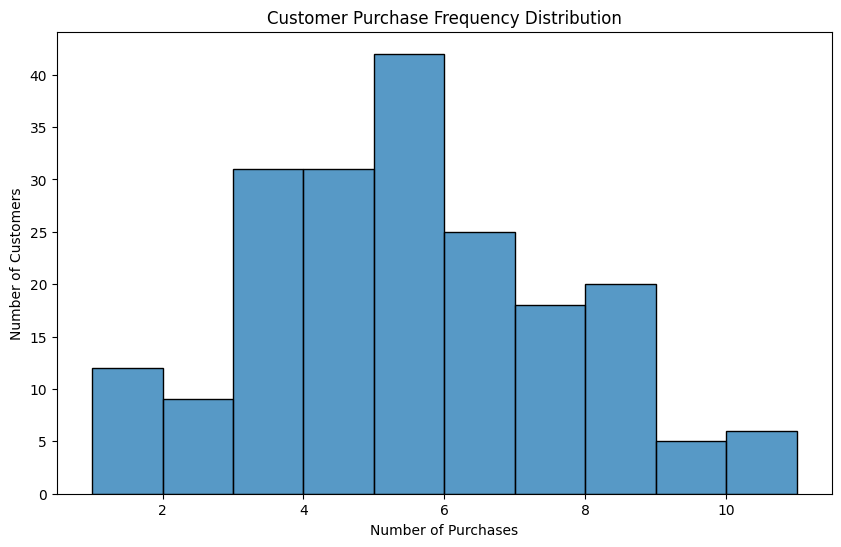

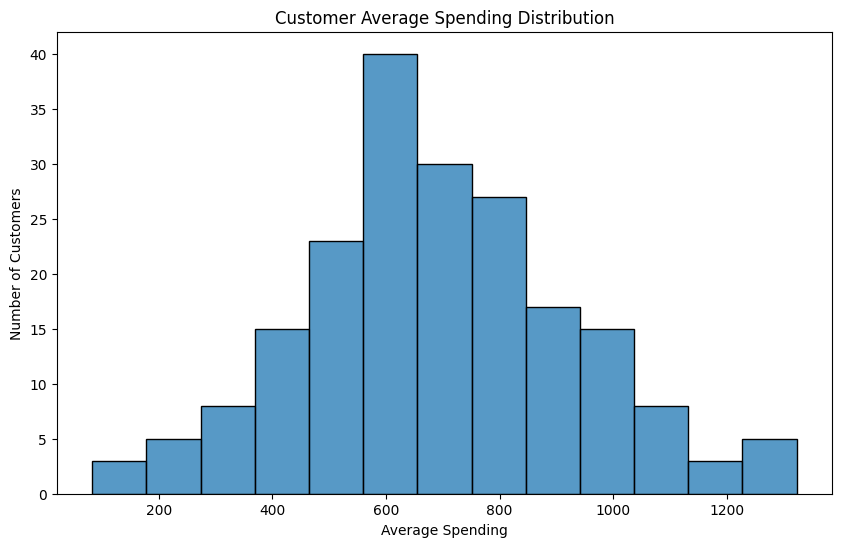


Customer Behavior Metrics:
Average Purchases per Customer: 5.03
Average Spending per Customer: $687.58


In [72]:

# 4. Customer Purchase Behavior
def analyze_customer_behavior(full_data):
    print("\nCustomer Purchase Behavior")
    print("="*50)

    # Customer purchase frequency
    customer_frequency = full_data.groupby('CustomerID')['TransactionID'].count()
    plt.figure(figsize=(10, 6))
    sns.histplot(customer_frequency)
    plt.title('Customer Purchase Frequency Distribution')
    plt.xlabel('Number of Purchases')
    plt.ylabel('Number of Customers')
    plt.show()

    # Customer average spending
    customer_spending = full_data.groupby('CustomerID')['TotalValue'].mean()
    plt.figure(figsize=(10, 6))
    sns.histplot(customer_spending)
    plt.title('Customer Average Spending Distribution')
    plt.xlabel('Average Spending')
    plt.ylabel('Number of Customers')
    plt.show()

    print("\nCustomer Behavior Metrics:")
    print(f"Average Purchases per Customer: {customer_frequency.mean():.2f}")
    print(f"Average Spending per Customer: ${customer_spending.mean():.2f}")

analyze_customer_behavior(full_data)


### Business Insights

In [73]:

# 5. Business Insights
def generate_business_insights(full_data):
    print("\nKey Business Insights")
    print("="*50)

    # 1. Regional Performance
    regional_performance = full_data.groupby('Region').agg({
        'TotalValue': ['sum', 'mean'],
        'TransactionID': 'count',
        'CustomerID': 'nunique'
    })
    best_region = regional_performance[('TotalValue', 'sum')].idxmax()

    # 2. Product Category Analysis
    category_performance = full_data.groupby('Category').agg({
        'TotalValue': ['sum', 'mean'],
        'TransactionID': 'count'
    })
    best_category = category_performance[('TotalValue', 'sum')].idxmax()

    # 3. Customer Segmentation by Value
    customer_value = full_data.groupby('CustomerID')['TotalValue'].sum()
    high_value_customers = len(customer_value[customer_value > customer_value.quantile(0.9)])

    # 4. Seasonal Trends
    full_data['Month'] = full_data['TransactionDate'].dt.month
    monthly_sales = full_data.groupby('Month')['TotalValue'].sum()
    peak_month = monthly_sales.idxmax()

    # 5. Customer Retention
    customer_first_purchase = full_data.groupby('CustomerID')['TransactionDate'].min()
    customer_last_purchase = full_data.groupby('CustomerID')['TransactionDate'].max()
    customer_lifetime = (customer_last_purchase - customer_first_purchase).dt.days
    avg_customer_lifetime = customer_lifetime.mean()

    # Print insights
    insights = [
        f"1. Regional Performance: {best_region} leads in sales with ${regional_performance.loc[best_region, ('TotalValue', 'sum')]:,.2f} " +
        f"in total revenue and {regional_performance.loc[best_region, ('CustomerID', 'nunique')]:,} unique customers.",

        f"2. Product Category Success: {best_category} is the best-performing category with " +
        f"${category_performance.loc[best_category, ('TotalValue', 'sum')]:,.2f} in sales and " +
        f"{category_performance.loc[best_category, ('TransactionID', 'count')]:,} transactions.",

        f"3. High-Value Customer Base: Identified {high_value_customers} high-value customers (top 10%) " +
        f"with average spending of ${customer_value[customer_value > customer_value.quantile(0.9)].mean():,.2f}.",

        f"4. Seasonal Patterns: Peak sales occur in month {peak_month} with ${monthly_sales[peak_month]:,.2f} " +
        "in revenue, suggesting seasonal buying patterns.",

        f"5. Customer Engagement: Average customer lifetime is {avg_customer_lifetime:.1f} days with " +
        f"{len(customer_lifetime[customer_lifetime > 180])} customers showing long-term engagement (>6 months)."
    ]

    # Save insights to file
    with open('FirstName_LastName_EDA.txt', 'w') as f:
        f.write("E-commerce Business Insights\n\n")
        for insight in insights:
            f.write(insight + "\n\n")

    # Print insights
    for insight in insights:
        print("\n" + insight)

# Generate and save business insights
generate_business_insights(full_data)


Key Business Insights

1. Regional Performance: South America leads in sales with $219,352.56 in total revenue and 59 unique customers.

2. Product Category Success: Books is the best-performing category with $192,147.47 in sales and 270 transactions.

3. High-Value Customer Base: Identified 20 high-value customers (top 10%) with average spending of $6,888.98.

4. Seasonal Patterns: Peak sales occur in month 7 with $71,366.39 in revenue, suggesting seasonal buying patterns.

5. Customer Engagement: Average customer lifetime is 224.4 days with 150 customers showing long-term engagement (>6 months).
